<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/Multilayer_Perceptron_Learning(Ass_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**kunal routray**

1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils  import to_categorical

import warnings
warnings.filterwarnings('ignore')



2.Dataset Analysis

In [2]:

# Load Dataset

url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data=pd.read_csv(url,delimiter=';')


In [3]:
print("Dataset Sample:")
data.head()


Dataset Sample:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


3.Preprocessing

In [6]:
#split into features and target
X=data.drop('quality',axis=1)
y_categorical=to_categorical(data['quality'])

# split training (80%) and testing(20%) sets
X_train,X_test,y_train,y_test=train_test_split(X,y_categorical,test_size=0.2,random_state=42)

print("\nTraining Set Size :", X_train.shape)
print("Testing Set Size :",X_test.shape)



Training Set Size : (3918, 11)
Testing Set Size : (980, 11)


In [7]:
#standardize the feature using standardscaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print("\nFeature Standardization Completed")



Feature Standardization Completed


4.Perform Explaratory Data Analysis (EDA)

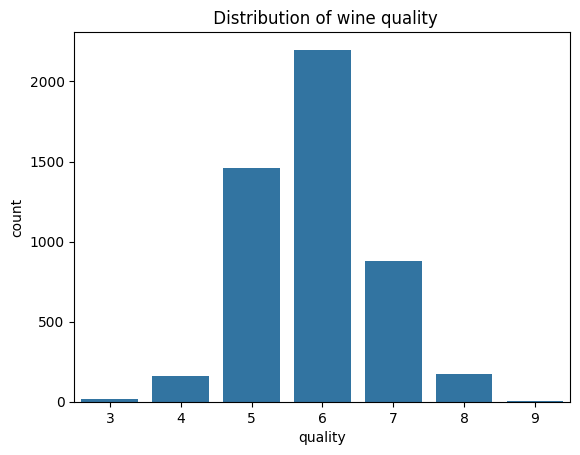

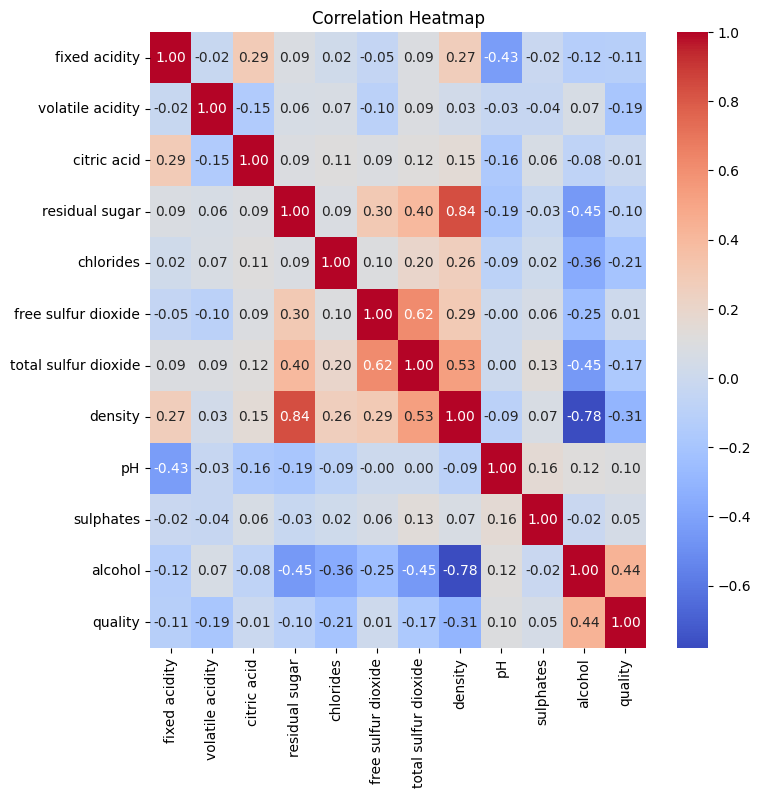

In [8]:
#plot class distribution
sns.countplot(x=data['quality'])
plt.title(" Distribution of wine quality")
plt.show()

#correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

5.Build and Train an MLP Classifier

In [9]:
#create the MLP model

model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(y_categorical.shape[1],activation='softmax') # Changed to y_categorical.shape[1] neurons and softmax activation
])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,546 (13.85 KB)

 Trainable params: 3,546 (13.85 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


#Train model
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3330 - loss: 1.9039 - val_accuracy: 0.5000 - val_loss: 1.2344
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5484 - loss: 1.1512 - val_accuracy: 0.5388 - val_loss: 1.1475
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5559 - loss: 1.1200 - val_accuracy: 0.5398 - val_loss: 1.1204
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5538 - loss: 1.0821 - val_accuracy: 0.5469 - val_loss: 1.1023
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5549 - loss: 1.0766 - val_accuracy: 0.5480 - val_loss: 1.0918
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5752 - loss: 1.0360 - val_accuracy: 0.5531 - val_loss: 1.0872
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 1.0253 - val_accuracy: 0.5469 - val_loss: 1.0768
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5781 - loss: 1.0478 - val_accuracy: 0

6.Evaluate Model Performance

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy Score: 0.563265306122449
Precision Score: 0.5612742909251612
Recall Score: 0.563265306122449
F1 Score: 0.5535343191938246


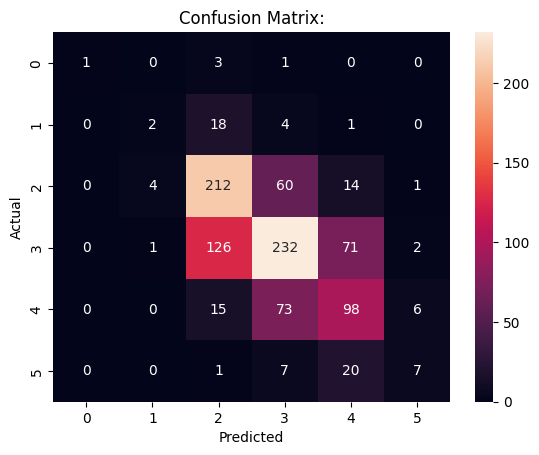

[[  1   0   3   1   0   0]
 [  0   2  18   4   1   0]
 [  0   4 212  60  14   1]
 [  0   1 126 232  71   2]
 [  0   0  15  73  98   6]
 [  0   0   1   7  20   7]]


In [11]:
#prediction
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) # Get predicted class index
y_true = np.argmax(y_test, axis=1) # Get true class index from one-hot encoded labels

#print performance matrics
print("Accuracy Score:",accuracy_score(y_true,y_pred))
print("Precision Score:",precision_score(y_true,y_pred,average='weighted'))
print("Recall Score:",recall_score(y_true,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_true,y_pred,average='weighted'))

#Confusion Matrix
cm=confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix:")
plt.show()
print(cm)

7.Plot Training Performance

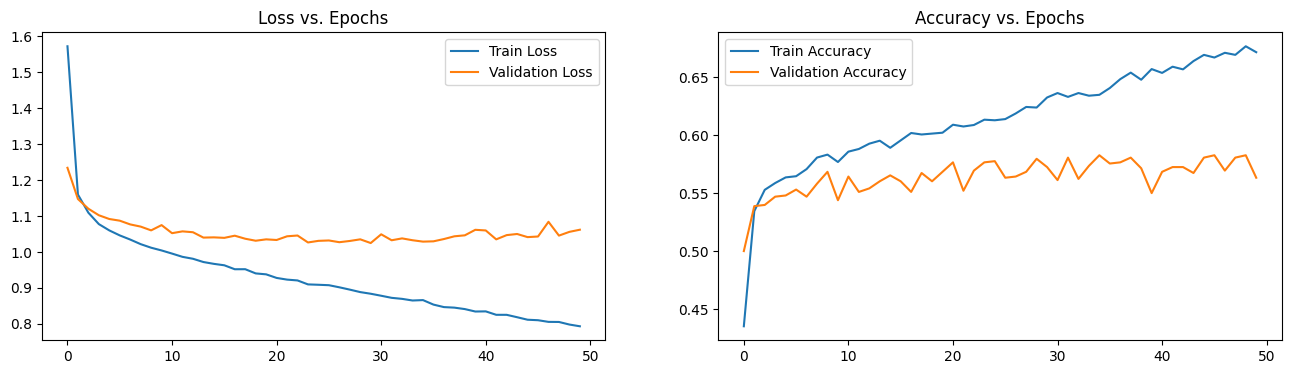

In [12]:

plt.figure(figsize=(16,4))

#plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title("Loss vs. Epochs")

#plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title("Accuracy vs. Epochs")

plt.show()
